In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import random
import scipy.stats as stats

# Importing data 

In [2]:
data_with_inflation = pd.read_csv('data_adjusted_to_inflation.csv')
data_for_ht = data_with_inflation.replace(0,data_with_inflation.median())

# H3 - 50's and 60's movies made more profit than movies nowadays

In [3]:
fifth_movies = list((data_for_ht[(data_for_ht['decade'] == "50s")|(data_for_ht['decade'] == "60s")]['profit_adjusted']))
now_movies = list((data_for_ht[(data_for_ht['decade']== "00s")|(data_for_ht['decade'] == "10s")]['profit_adjusted']))

## Getting 2 samples of equal size 

In [4]:
fifth_movies_sample = random.sample(fifth_movies, 190)
now_movies_sample = random.sample(now_movies, 190)

## Variance and mean of the samples 

In [5]:
print("The variance for the movies on 50s/60s is: {}".format(np.var(fifth_movies_sample)))
print("The std for the movies on 50s/60s is: {}".format(np.std(fifth_movies_sample)))
print("The mean for the movies on 50s/60s is: {}".format(np.mean(fifth_movies_sample)))

print('===============')

print("The variance for the movies nowadays is: {}".format(np.var(now_movies_sample)))
print("The std for the movies on nowadays is: {}".format(np.std(now_movies_sample)))
print("The mean for the movies on nowadays is: {}".format(np.mean(now_movies_sample)))



The variance for the movies on 50s/60s is: 6888366346405247.0
The std for the movies on 50s/60s is: 82996182.72188936
The mean for the movies on 50s/60s is: 76137962.95928966
The variance for the movies nowadays is: 773905936617205.9
The std for the movies on nowadays is: 27819164.915884983
The mean for the movies on nowadays is: 9263224.420036193


## Normality test for samples 

In [6]:
stats.normaltest(now_movies_sample)

NormaltestResult(statistic=131.49783096057186, pvalue=2.7900296319330185e-29)

In [7]:
stats.normaltest(fifth_movies_sample)

NormaltestResult(statistic=115.88984446047456, pvalue=6.836597645339171e-26)

## Plotting the distribution for both samples

Text(0, 0.5, 'Probability')

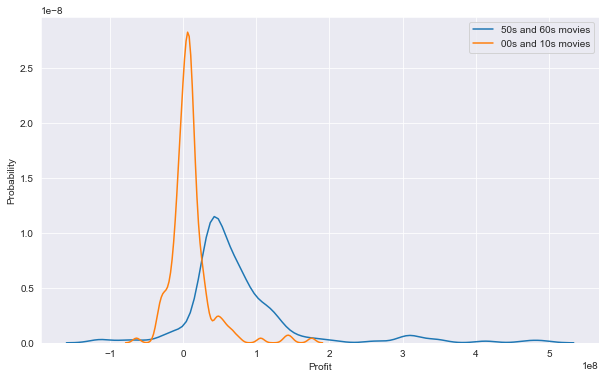

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(fifth_movies_sample, label='50s and 60s movies', hist= False)
sns.distplot(now_movies_sample, label='00s and 10s movies', hist=False)

plt.xlabel('Profit')
plt.ylabel('Probability')

## Difference between distribution means

In [9]:
diff_means = np.mean(fifth_movies_sample) - np.mean(now_movies_sample)
print("The difference between means is {}".format(diff_means))

The difference between means is 66874738.53925346


## Functions to create t-statistic

$$\large t = \frac{\bar{x}{1} - \bar{x}{2}}{\sqrt{s^{2}{p} (\frac{1}{n{1}} + \frac{1}{n_{2}}) } } $$

Where $s^{2}_{p}$ is the pooled sample variance, calculated as:

$$\large s^{2}{p} = \frac{(n{1} -1)s^{2}{1} + (n{2} -1)s^{2}{2}}{n{1} + n_{2} - 2} $$

Where $s^{2}{1}$ and $s^{2}{2}$ are the variances for each sample given by the formula $$ \large s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1} $$

In [10]:
def pooled_variance(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    var1 = np.var(sample1)
    var2 = np.var(sample2)
    num = (n1-1)*var1 + (n2-1)*var2
    den = n1 + n2 - 2
    return num/den

In [11]:
def tstatistic(fifth, now):
    fifth_mean, now_mean = np.mean(fifth), np.mean(now)
    pool_var = pooled_variance(fifth, now)
    n_f, n_n = len(fifth), len(now)
    num = fifth_mean - now_mean
    denom = np.sqrt(pool_var * ((1/n_f)+(1/n_n)))
    return num / denom

t_stat = tstatistic(fifth_movies_sample, now_movies_sample)
t_stat

10.530769505031941

In [12]:
import scipy.stats
# import stats.t
from scipy import stats

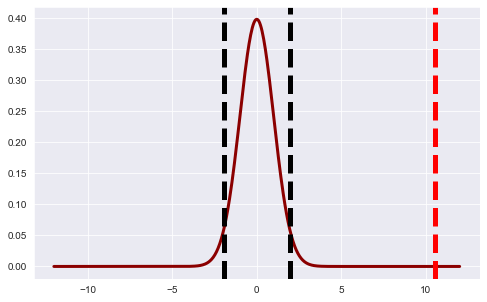

In [13]:
def visualize_t(t_stat, n_control, n_experimental):
    
    """
    Visualize the critical t values on a t distribution
    
    Parameters
    -----------
    t-stat: float
    n_control: int
    n_experiment: int
    
    Returns
    ----------
    None
    
    """
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-12, 12, 500)

    # use stats.t.ppf to get critical value. For alpha = 0.05 and two tailed test
    crit = stats.t.ppf(1-0.025, (n_control+n_experimental-2))
    
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(crit, color='black', linestyle='--', lw=5)
    ax.axvline(-crit, color='black', linestyle='--', lw=5)
    ax.axvline(t_stat, color='red', linestyle='--', lw=5)
    
    plt.show()
    return None

n_control = len(fifth_movies_sample)
n_experimental = len(now_movies_sample)
visualize_t(t_stat, n_control, n_experimental)


## Getting p-value

In [14]:
lower_tail = stats.t.cdf(-t_stat, (190+190-2), 0, 1)
# Upper tail comulative density function returns area under upper tail curve
upper_tail = 1. - stats.t.cdf(t_stat, (190+190-2), 0, 1)

p_value = lower_tail+upper_tail
print(p_value)

3.2663457478847345e-23


In [15]:
stats.ttest_ind(fifth_movies_sample, now_movies_sample)

Ttest_indResult(statistic=10.503020393545178, pvalue=8.203713660640418e-23)

# H4 - Movies nowadays have more budget than in 50s and 60s

In [194]:
fifth_movies = list((data_for_ht[(data_for_ht['decade'] == "50s")|(data_for_ht['decade'] == "60s")]['budget_adjusted']))
now_movies = list((data_for_ht[(data_for_ht['decade']== "00s")|(data_for_ht['decade'] == "10s")]['budget_adjusted']))

## Getting 2 samples of equal size 

In [195]:
fifth_movies_sample = random.sample(fifth_movies, 190)
now_movies_sample = random.sample(now_movies, 190)

## Variance and mean of the samples 

In [196]:
print("The variance for the movies on 50s/60s is: {}".format(np.var(fifth_movies_sample)))
print("The std for the movies on 50s/60s is: {}".format(np.std(fifth_movies_sample)))
print("The mean for the movies on 50s/60s is: {}".format(np.mean(fifth_movies_sample)))

print('===============')

print("The variance for the movies nowadays is: {}".format(np.var(now_movies_sample)))
print("The std for the movies on nowadays is: {}".format(np.std(now_movies_sample)))
print("The mean for the movies on nowadays is: {}".format(np.mean(now_movies_sample)))



The variance for the movies on 50s/60s is: 480745881199266.6
The std for the movies on 50s/60s is: 21925918.024093464
The mean for the movies on 50s/60s is: 19836591.419738133
The variance for the movies nowadays is: 449392981510952.25
The std for the movies on nowadays is: 21198891.04436721
The mean for the movies on nowadays is: 24320812.290246602


## Normality test for samples 

In [197]:
stats.normaltest(now_movies_sample)

NormaltestResult(statistic=50.14921981948932, pvalue=1.2889476537839859e-11)

In [198]:
stats.normaltest(fifth_movies_sample)

NormaltestResult(statistic=168.4494794698552, pvalue=2.640342664388317e-37)

## Plotting the distribution for both samples

Text(0, 0.5, 'Probability')

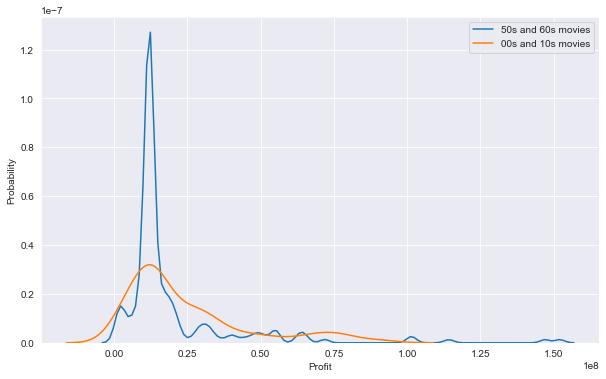

In [199]:
plt.figure(figsize=(10,6))
sns.distplot(fifth_movies_sample, label='50s and 60s movies', hist= False)
sns.distplot(now_movies_sample, label='00s and 10s movies', hist=False)

plt.xlabel('Profit')
plt.ylabel('Probability')

## Difference between distribution means

In [200]:
diff_means = np.mean(fifth_movies_sample) - np.mean(now_movies_sample)
print("The difference between means is {}".format(diff_means))

The difference between means is -4484220.87050847


## Functions to create t-statistic

$$\large t = \frac{\bar{x}{1} - \bar{x}{2}}{\sqrt{s^{2}{p} (\frac{1}{n{1}} + \frac{1}{n_{2}}) } } $$

Where $s^{2}_{p}$ is the pooled sample variance, calculated as:

$$\large s^{2}{p} = \frac{(n{1} -1)s^{2}{1} + (n{2} -1)s^{2}{2}}{n{1} + n_{2} - 2} $$

Where $s^{2}{1}$ and $s^{2}{2}$ are the variances for each sample given by the formula $$ \large s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1} $$

In [201]:
def pooled_variance(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    var1 = np.var(sample1)
    var2 = np.var(sample2)
    num = (n1-1)*var1 + (n2-1)*var2
    den = n1 + n2 - 2
    return num/den

In [202]:
def tstatistic(fifth, now):
    fifth_mean, now_mean = np.mean(fifth), np.mean(now)
    pool_var = pooled_variance(fifth, now)
    n_f, n_n = len(fifth), len(now)
    num = fifth_mean - now_mean
    denom = np.sqrt(pool_var * ((1/n_f)+(1/n_n)))
    return num / denom

t_stat = tstatistic(fifth_movies_sample, now_movies_sample)
t_stat

-2.026702022921712

In [203]:
import scipy.stats
# import stats.t
from scipy import stats

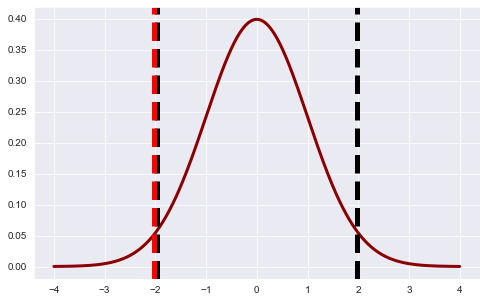

In [204]:
def visualize_t(t_stat, n_control, n_experimental):
    
    """
    Visualize the critical t values on a t distribution
    
    Parameters
    -----------
    t-stat: float
    n_control: int
    n_experiment: int
    
    Returns
    ----------
    None
    
    """
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.ppf to get critical value. For alpha = 0.05 and two tailed test
    crit = stats.t.ppf(1-0.025, (n_control+n_experimental-2))
    
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(crit, color='black', linestyle='--', lw=5)
    ax.axvline(-crit, color='black', linestyle='--', lw=5)
    ax.axvline(t_stat, color='red', linestyle='--', lw=5)
    
    plt.show()
    return None

n_control = len(fifth_movies_sample)
n_experimental = len(now_movies_sample)
visualize_t(t_stat, n_control, n_experimental)


# Walch T-test

In [205]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """

    numerator = np.mean(a) - np.mean(b)
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(np.var(a, ddof=1)/np.array(a).size + np.var(b, ddof=1)/np.array(b).size)
    
    return np.abs(numerator/denominator)

welch_t(fifth_movies_sample, now_movies_sample)

2.0213615603508015

In [206]:
welch_t_test = welch_t(fifth_movies_sample, now_movies_sample)

## Visualizing Walch t-statistic

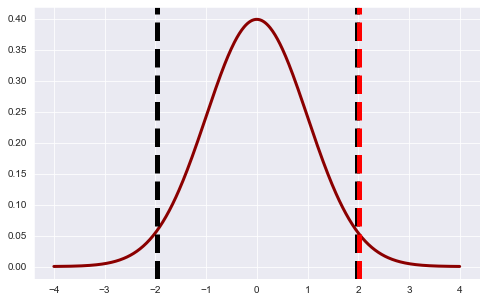

In [207]:
visualize_t(welch_t_test, n_control, n_experimental)

## Degrees of freedom 

In [208]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = np.var(a, ddof=1) 
    s2 = np.var(b, ddof=1)
    n1 = len(a)
    n2 = len(b)
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator


In [209]:
welch_df(fifth_movies_sample, now_movies_sample)

377.57099883241335

## Getting p-value

In [210]:
t = welch_t(fifth_movies_sample, now_movies_sample)
df = welch_df(fifth_movies_sample, now_movies_sample)

In [211]:
def p_value(a, b, two_sided=False):

    t = welch_t(a, b)
    df = welch_df(a, b)
    
    p = 1-stats.t.cdf(np.abs(t), df)
    
    if two_sided:
        return 2*p
    else:
        return p

In [212]:
p_value(fifth_movies_sample, now_movies_sample)

0.021973725951012213